<center><h1> Validation and Learning Curves </h1></center>
***

Here we will see validation and learning curve for model. 
Random forest works different than other models, and complexity of model doesn't make the model to overfit, the more estimators we use, more unbiased gets the estimator, so in validation curve you can see that, when using less estimators, accuracy is less too, and after some number of estimators, accuracy doesn't really change.

In [1]:
import set_jupyter_path
from sklearn.model_selection import validation_curve, learning_curve
from src.car_price_prediction.utils import df_utils, dataset_manager, model_manager
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
validation_params = [1,2,3,5,10,20,30,40]
df = dataset_manager.get_processed_dataset()
X, y = df_utils.get_data_and_target(df)
X = pd.get_dummies(X)
forest = RandomForestRegressor

In [3]:
train_scores,valid_scores = validation_curve(forest(),X,y,'n_estimators',validation_params)

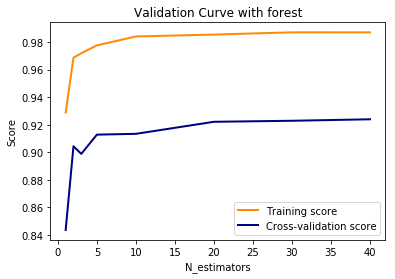

In [4]:
plt.title("Validation Curve with forest")
plt.xlabel("N_estimators")
plt.ylabel("Score")
lw = 2
plt.plot(validation_params, np.mean(train_scores,axis=1), label="Training score",
             color="darkorange", lw=lw)
plt.plot(validation_params, np.mean(valid_scores,axis=1), label="Cross-validation score",
             color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Here, we will see the learning curve, learning curve is a plot of how model learns given range of samples to train, it usually refers to a plot of the prediction accuracy/error vs. the training set size (ie: how better does the model get at predicting the target as you the increase number of instances used to train it)

In [7]:
learning_range = np.linspace(0.1,1.0,10)
train_sizes, train_scores, valid_scores = learning_curve(forest(n_estimators=15), X, y, train_sizes  = learning_range, cv=5)

C:\Users\AsusInside\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1103: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


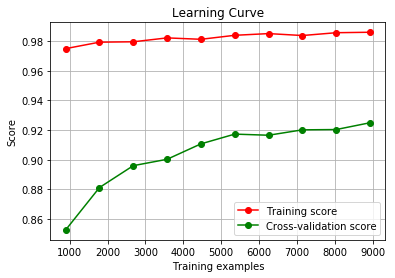

In [8]:
plt.figure()
plt.title('Learning Curve')
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()
plt.plot(train_sizes, np.mean(train_scores,axis=1), 'o-', color="r",label="Training score")
plt.plot(train_sizes, np.mean(valid_scores, axis=1), 'o-', color="g",label="Cross-validation score")
plt.legend(loc="best")
plt.show()